In [2]:
using Pkg
Pkg.activate(".")
Pkg.add("Plots")
Pkg.add("BenchmarkTools")

  Activating project at `c:\School\BS Thesis\src`
    Updating registry at `C:\Users\ioakimsy\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\School\BS Thesis\src\Project.toml`
    Updating `C:\School\BS Thesis\src\Manifest.toml`
  [ea2cea3b] ↑ Qt5Base_jll v5.15.3+1 ⇒ v5.15.3+2
Precompiling project...
  ✓ Qt5Base_jll
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  4 dependencies successfully precompiled in 61 seconds. 209 already precompiled.
   Resolving package versions...
  No Changes to `C:\School\BS Thesis\src\Project.toml`
  No Changes to `C:\School\BS Thesis\src\Manifest.toml`


In [3]:
using Plots
using BenchmarkTools

# 1D Elementary Cellular Automata

In [2]:
size=15
grid = rand([0,1],1,size)

new_grid = zeros(Int64, 1, size)
for i in range(1,size)
    if grid[1,i]==1
        #println("checking index = ", i)
        new_grid[1,i]=1
        #println("index ", i, "set to 1")
    else
        #println("checking index = ", i)
        if i==1
            #println("cell at left end")
            if grid[1,i+1] == 1
                new_grid[1,i]=1
                #println("index ", i+1, " is 1")
            end

        elseif i == size
            #println("cell at right end")
            if grid[1,i-1] == 1
                new_grid[1,i]=1
                #println("index ", i-1, " is 1")
            end

        else
            #println("cell in the middle")
            if grid[1,i+1]==1 || grid[1,i-1] == 1
                new_grid[1,i] = 1
                #println("one of the adjacent cells is 1")
            end
        end
    end 
    #println("")
end         
println(grid)
#println("")
println(new_grid)

[0 0 0 0 0 0 1 0 0 1 1 0 0 1 1]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


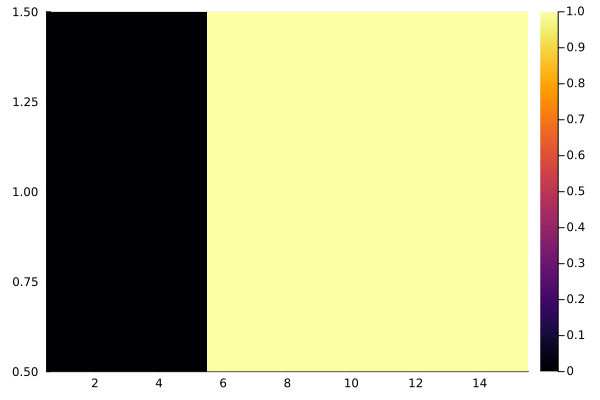

In [3]:
heatmap(new_grid)

┌ Info: Saved animation to c:\School\BS Thesis\src\tmp.gif
└ @ Plots C:\Users\ioakimsy\.julia\packages\Plots\jqILG\src\animation.jl:149


Plots.AnimatedGif("c:\\School\\BS Thesis\\src\\tmp.gif")
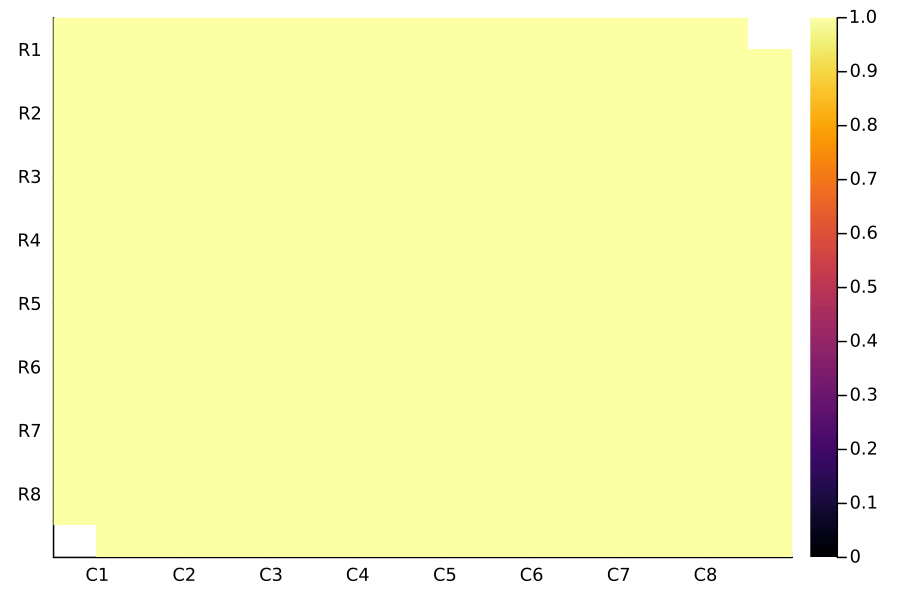

In [8]:
elem_CA_1D = Animation()
frame(elem_CA_1D, heatmap!(grid))
frame(elem_CA_1D, heatmap!(new_grid))
gif(elem_CA_1D,fps=1)

# 2D Elementary Cellular Automata

## Declaring Functions

### initial_grid_type(kind,size)

In [4]:
function initial_grid_type(kind,size)
    grid = zeros(Int64,size,size)
    
    if kind == "Corners"
        grid[1,1] = 1
        grid[1,size] = 1
        grid[size,1] = 1
        grid[size,size] = 1
        
    elseif kind == "Middle"
        if size%2 == 1
            middle = (size+1)/2
            middle = convert(Int,middle)
            grid[middle,middle] = 1
            
        elseif size%2 == 0
            middle = size/2
            middle = convert(Int,middle)
            grid[middle:middle+1,middle:middle+1] .= 1
            
        end
        
    end
    
    return grid
end 

initial_grid_type (generic function with 1 method)

### generate_next_grid(grid,size)

In [5]:
function generate_next_grid(grid,size)
    new_grid = zeros(Int64,size,size)

    for x in range(1,size)
        for y in range(1,size)

            #Top left corner
            if y==1 && x==1 && grid[y,x] == 1
                new_grid[y,x:x+1] .= 1
            
            
            #Top right corner
            elseif y==1 && x==size && grid[y,x] == 1
                new_grid[y,x-1:x] .= 1
            
        
            #Top row, middle cells
            elseif y==1 && x>1 && x<size && grid[y,x] == 1
                new_grid[y,x-1:x+1] .= 1
            
        
            #Left column, 2nd to last row
            elseif y>1 && x==1 && grid[y,x] == 1
                new_grid[y-1:y,x:x+1] .= 1
            
    
            #Right column, 2nd row to last row
            elseif y>1 && x==size && grid[y,x] == 1
                new_grid[y-1:y,x-1:x] .= 1
            
            
            #All middle cells
            elseif y>1 && x>1 && x<size && grid[y,x] == 1
                new_grid[y-1:y,x-1:x+1] .= 1
            end

        end
    end
    return new_grid
end

generate_next_grid (generic function with 1 method)

## Main code

Done Initializing

Generating animation
test
Steady state reached after 6 generations. Room fully infected
  8.912017 seconds (8.44 M allocations: 434.912 MiB, 1.72% gc time, 91.42% compilation time: 12% of which was recompilation)


┌ Info: Saved animation to c:\School\BS Thesis\src\tmp.gif
└ @ Plots C:\Users\ioakimsy\.julia\packages\Plots\jqILG\src\animation.jl:149


Plots.AnimatedGif("c:\\School\\BS Thesis\\src\\tmp.gif")
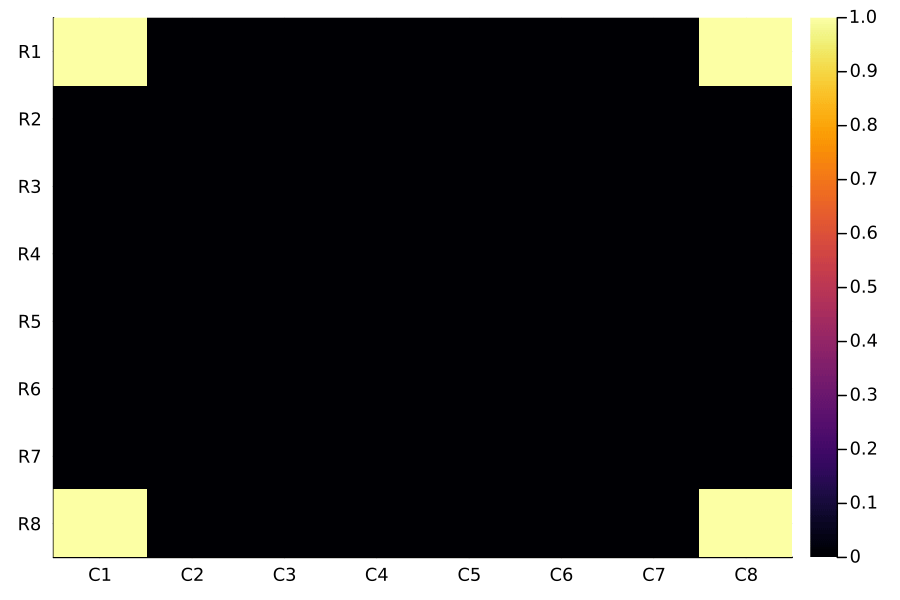

In [6]:
@time begin

size = 8
grid_collection = []
max_grids = 30
grid_count = 0
steady_state = false
full_grid = ones(Int64,size,size)

#animation initialization
Ani = Animation()

#Initial grid
grid = initial_grid_type("Corners",size)
push!(grid_collection,grid)
println("Done Initializing")
println("")

#generating next grids
while grid_count < max_grids 
    if grid != full_grid
        new_grid = generate_next_grid(grid,size)
        push!(grid_collection,new_grid)
        if new_grid==grid
            steady_state = true
            break
        end
        grid = new_grid
        grid_count += 1
    else
        break
    end
end

#generating the animation
xs = [string("C", i) for i = 1:size]
ys = [string("R", i) for i = 1:size]
println("Generating animation")
for grid_number in range(1,length(grid_collection))
    frame(Ani,heatmap(xs,ys,grid_collection[grid_number],dpi=150,yflip=true,grid=true))
end
println("test")

#Output
if steady_state
    println("Steady state reached after ", grid_count, " generations. No more infections can occur")
elseif grid_count<max_grids
    println("Steady state reached after ", grid_count, " generations. Room fully infected")
else
    println("Room did not get fully infected, stopped at generation ", grid_count)
end
gif(Ani,fps=2)

end